In [2]:
import mat4py as mp
import scipy.io
import numpy as np
import pickle

data1 = scipy.io.loadmat('ourData1.mat') 
data2 = scipy.io.loadmat('ourData2.mat') 
data3 = scipy.io.loadmat('ourData3.mat')
# pickle_out = open("data1.pickle","wb")
# pickle.dump(data1, pickle_out)
# pickle_out.close()

# pickle_out = open("data2.pickle","wb")
# pickle.dump(data2, pickle_out)
# pickle_out.close()

# pickle_in = open("data1.pickle","rb")
# data1 = pickle.load(pickle_in)
# pickle_in = open("data2.pickle","rb")
# data2 = pickle.load(pickle_in)



In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
# print(type(data1))
# pp.pprint(data1)

# print(type(data2))
# print(data2)
print()
print()
print()
# print(type(data1['evt_ECI_TCPIP_55513']))

pp.pprint(data3)
pp.pprint(len(data1['a014100113_visual_odd_ball_01092019_1841_20190901_070728_band_0_60_notch50_filmff'][1]))
pp.pprint(len(data1['evt_ECI_TCPIP_55513']))
pp.pprint(data1['evt_ECI_TCPIP_55513'][0])
pp.pprint(data1['evt_ECI_TCPIP_55513'][1])
pp.pprint(data1['evt_ECI_TCPIP_55513'][3])




{   'EEGSamplingRate': array([[250.]]),
    'Impedances_EEG_0': array([[  61.51886916],
       [ 586.02700311],
       [3976.7447896 ],
       [  50.8286209 ],
       [  52.5834106 ],
       [  18.64959976],
       [  27.33464186],
       [  39.09739281],
       [3411.9080935 ],
       [  50.92672178],
       [  51.65229038],
       [  51.07164454],
       [  31.25012666],
       [2991.30283185],
       [  10.19506422],
       [  22.8412103 ],
       [  29.30347836],
       [  29.73169146],
       [  38.52130403],
       [  13.54614246],
       [  10.38543957],
       [  11.71998752],
       [  10.01456423],
       [   7.25711678],
       [  40.19808395],
       [  32.25179274],
       [   8.28979981],
       [   9.83608643],
       [  20.99079699],
       [  17.27649327],
       [  14.86069524],
       [  48.72450802],
       [  23.40024894],
       [  18.93424419],
       [  18.63559893],
       [  28.16305821],
       [  58.60008768],
       [  17.13489977],
       [  27.84628307

In [4]:
#so data1['evt_ECI_TCPIP_55513'][3] has the frames at which you need to fragment
#The actual data is in data1['a014100113_visual_odd_ball_01092019_1841_20190901_070728_band_0_60_notch50_filmff']

#So we need to make a new array of arrays of arrays in a way that the smallest of the arrays correspond to a single
#image in the stimulus - this fragmentation needs to be done using the data in data1['evt_ECI_TCPIP_55513'][3]


fragmented_data = []
current_channel_fragmentation = []
for channel_number, channel_data in enumerate(data3['a014100112_visual_odd_ball_01092019_0410_20190901_041957_band_0_60_notch50_filmff']):
    for event_number, event_frames in enumerate(data3['evt_ECI_TCPIP_55513'][3]):
#         indices = list(range(1, len(channel_data)))
#         listified_channel_data = np.array(channel_data)[indices.astype(int)]
        #print(event_frames[0][0])
        current_frame_data = channel_data[int(event_frames[0][0]):int(event_frames[0][0])+250]
        current_channel_fragmentation.append(current_frame_data)
    fragmented_data.append(current_channel_fragmentation)
    current_channel_fragmentation = []
    
#print(fragmented_data)

In [5]:
len(fragmented_data)

129

In [6]:
pp.pprint(data1['evt_ECI_TCPIP_55513'][0])

array([array(['VBLS'], dtype='<U4'), array(['1S  '], dtype='<U4'),
       array(['1E  '], dtype='<U4'), array(['2S  '], dtype='<U4'),
       array(['2E  '], dtype='<U4'), array(['3S  '], dtype='<U4'),
       array(['3E  '], dtype='<U4'), array(['4S  '], dtype='<U4'),
       array(['4E  '], dtype='<U4'), array(['5S  '], dtype='<U4'),
       array(['5E  '], dtype='<U4'), array(['6S  '], dtype='<U4'),
       array(['6E  '], dtype='<U4'), array(['7S  '], dtype='<U4'),
       array(['7E  '], dtype='<U4'), array(['8S  '], dtype='<U4'),
       array(['8E  '], dtype='<U4'), array(['9S  '], dtype='<U4'),
       array(['9E  '], dtype='<U4'), array(['10S '], dtype='<U4'),
       array(['10E '], dtype='<U4'), array(['11S '], dtype='<U4'),
       array(['11E '], dtype='<U4'), array(['12S '], dtype='<U4'),
       array(['12E '], dtype='<U4'), array(['13S '], dtype='<U4'),
       array(['13E '], dtype='<U4'), array(['14S '], dtype='<U4'),
       array(['14E '], dtype='<U4'), array(['15S '], dtype='<U

In [7]:
global_indices = list(range(1, 255, 2))
#pp.pprint(regular_indices)
deviant_indices_generator = [9,21,33,47,61]
deviant_indices = []
for i in range(0,4):
    for index in deviant_indices_generator:
        deviant_indices.append(64*i+index)

regular_indices = [x for x in global_indices if x not in deviant_indices and x not in [63,127,191]]
# print(deviant_indices)
# print(regular_indices)

In [8]:
#!pip3 install itertools
import itertools

regular_trials_container = []
for index in regular_indices:
    trial_matrix = []
    for channel_fragmented_data in itertools.islice(fragmented_data,0,len(fragmented_data)-1):
        trial_matrix.append(channel_fragmented_data[index])
    #pp.pprint(trial_matrix)
    regular_trials_container.append(trial_matrix)
     
#pp.pprint(regular_trials_container)

deviant_trials_container = []
for index in deviant_indices:
    trial_matrix = []
    for channel_fragmented_data in itertools.islice(fragmented_data,0,len(fragmented_data)-1):
        trial_matrix.append(channel_fragmented_data[index])
    #pp.pprint(trial_matrix)
    deviant_trials_container.append(trial_matrix)
     
        
pp.pprint(len(deviant_trials_container))

20


In [9]:
#regular_trials_container
#deviant_trials_container
#!pip3 install numpy
import numpy

sum_of_individual_matrices_regular = numpy.zeros(shape=(128,128))
sum_of_individual_matrices_deviant = numpy.zeros(shape=(128,128))


for single_regular_matrix in regular_trials_container:
    curr_matrix = np.array(single_regular_matrix)
    #print(curr_matrix)
    curr_matrix_transpose = curr_matrix.transpose()
    resultant_covariance_of_the_trial = curr_matrix.dot(curr_matrix_transpose)
    trace = resultant_covariance_of_the_trial.trace()
    resultant_covariance_of_the_trial = 1/trace * resultant_covariance_of_the_trial
    sum_of_individual_matrices_regular += resultant_covariance_of_the_trial
    
for single_deviant_matrix in deviant_trials_container:
    curr_matrix = np.array(single_deviant_matrix)
    #print(curr_matrix)
    curr_matrix_transpose = curr_matrix.transpose()
    resultant_covariance_of_the_trial = curr_matrix.dot(curr_matrix_transpose)
    trace = resultant_covariance_of_the_trial.trace()
    resultant_covariance_of_the_trial = 1/trace * resultant_covariance_of_the_trial
    sum_of_individual_matrices_deviant += resultant_covariance_of_the_trial

print(sum_of_individual_matrices_regular)
print(sum_of_individual_matrices_deviant)

sum_of_individual_matrices_regular = 1/104 * sum_of_individual_matrices_regular
sum_of_individual_matrices_deviant = 1/20 * sum_of_individual_matrices_deviant

[[ 0.49159678  0.20443581  0.13672181 ...  0.28744337  0.16420378
   0.10243362]
 [ 0.20443581  2.02939866  1.65915837 ...  0.31996793  0.62287419
   0.26052861]
 [ 0.13672181  1.65915837 13.5162712  ...  0.61784439  0.38816407
   0.1926682 ]
 ...
 [ 0.28744337  0.31996793  0.61784439 ...  0.88293085  0.24287289
   0.12922021]
 [ 0.16420378  0.62287419  0.38816407 ...  0.24287289  0.48082765
   0.19947831]
 [ 0.10243362  0.26052861  0.1926682  ...  0.12922021  0.19947831
   0.36318714]]
[[ 1.37453854e-01  6.02773433e-02 -2.33891110e-02 ...  4.02476294e-02
   3.59817771e-02  6.38524921e-03]
 [ 6.02773433e-02  5.84211901e-01  3.74439293e-01 ...  4.93434379e-02
   1.88390160e-01  5.97476497e-02]
 [-2.33891110e-02  3.74439293e-01  2.57580500e+00 ...  1.07256795e-01
   1.99918016e-01 -3.81239912e-02]
 ...
 [ 4.02476294e-02  4.93434379e-02  1.07256795e-01 ...  2.54954998e-01
   6.23795543e-02 -2.00545021e-03]
 [ 3.59817771e-02  1.88390160e-01  1.99918016e-01 ...  6.23795543e-02
   1.63803772

In [10]:
pp.pprint(sum_of_individual_matrices_regular)
pp.pprint(sum_of_individual_matrices_deviant)

import math

grand_spatial_covariance = sum_of_individual_matrices_deviant+sum_of_individual_matrices_regular
evd = np.linalg.eig(grand_spatial_covariance)
print(evd[1])
eigen_matrix = np.diag(evd[0])
#eigen_power_half

root_of_eigens=[]
for i in evd[0]:
    root_of_eigens.append(math.pow(i,-0.5))
eigen_power_half = np.diag(root_of_eigens)

whitening_matrix = eigen_power_half.dot(evd[1].transpose())
print(whitening_matrix)
print(whitening_matrix.dot(grand_spatial_covariance.dot(whitening_matrix.transpose())))

array([[0.00472689, 0.00196573, 0.00131463, ..., 0.00276388, 0.00157888,
        0.00098494],
       [0.00196573, 0.01951345, 0.01595345, ..., 0.00307661, 0.00598917,
        0.00250508],
       [0.00131463, 0.01595345, 0.12996415, ..., 0.00594081, 0.00373235,
        0.00185258],
       ...,
       [0.00276388, 0.00307661, 0.00594081, ..., 0.00848972, 0.00233532,
        0.0012425 ],
       [0.00157888, 0.00598917, 0.00373235, ..., 0.00233532, 0.00462334,
        0.00191806],
       [0.00098494, 0.00250508, 0.00185258, ..., 0.0012425 , 0.00191806,
        0.00349218]])
array([[ 6.87269269e-03,  3.01386716e-03, -1.16945555e-03, ...,
         2.01238147e-03,  1.79908886e-03,  3.19262461e-04],
       [ 3.01386716e-03,  2.92105950e-02,  1.87219647e-02, ...,
         2.46717189e-03,  9.41950802e-03,  2.98738248e-03],
       [-1.16945555e-03,  1.87219647e-02,  1.28790250e-01, ...,
         5.36283976e-03,  9.99590079e-03, -1.90619956e-03],
       ...,
       [ 2.01238147e-03,  2.46717189e-0

In [11]:
#The matrix has been successfully whitened now using the whitening matrix
#From here, we need to apply this whitening to the original average spatial covarinace matrices for both classes

s_regular = whitening_matrix.dot(sum_of_individual_matrices_regular.dot(whitening_matrix.transpose()))
s_deviant = whitening_matrix.dot(sum_of_individual_matrices_deviant.dot(whitening_matrix.transpose()))

evd_regular = np.linalg.eig(s_regular)
evd_deviant = np.linalg.eig(s_deviant)

projection_matrix = (evd_regular[1].transpose()).dot(whitening_matrix)

print(projection_matrix)



[[ 0.37303641  0.09968788 -0.05472122 ...  0.46671763 -1.98748831
   1.68980842]
 [-1.93413995 -0.33783268  0.00545089 ... -0.49428481  1.82868601
  -1.40029725]
 [ 1.73985429 -0.43537476 -0.02055133 ...  0.04787302  1.18031388
  -0.1128248 ]
 ...
 [-4.57345427 -0.43811357 -0.01365938 ...  0.18924046  0.44307141
  -0.26691859]
 [ 0.90885137  1.83735612 -0.27859912 ... -0.01347641  0.2981261
  -1.39019173]
 [ 2.59493423  1.25909093 -0.79046125 ... -0.07107183  2.03669515
  -0.78312272]]


In [12]:
#regular trials container
#deviant trials container

##Somehow I need to get 4*1 vectors - 4 or 6 of them. Half of them should have high variance for regular trials 
# and the other half should have maximal variance for the deviant trials. I will just create 4 such dummy columns
#for now and train a classifier



In [13]:
a = np.ones((4,128))
# b = np.ones((4,128))
# c = np.ones((4,128))
# d = np.ones((4,128))


#Now let us get 4*250 vectors for all the 124 trials, then let us get the 4*1 feature vectors for each of them 
transformed_regular_trials = []
transformed_deviant_trials = []

# print(a)

for trial in regular_trials_container:
    transformed_matrix = a.dot(trial)
    transformed_regular_trials.append(transformed_matrix)

for trial in deviant_trials_container:
    transformed_matrix = a.dot(trial)
    transformed_deviant_trials.append(transformed_matrix)  
    
print(transformed_deviant_trials)

[array([[ 1603.90188063,  1468.39002562,  1531.16207328,  1721.33447949,
         1729.31301666,  1533.02694342,  1465.40796933,  1644.68637239,
         1730.35219594,  1485.4027819 ,  1239.94004332,  1435.83929931,
         1930.62621212,  2171.94678886,  1983.50419268,  1763.17559646,
         1855.26895714,  2095.7946782 ,  2131.12889723,  1902.90599704,
         1605.9948805 ,  1356.32569633,  1134.04100593,   958.80584262,
          900.40908436,   928.96375615,   918.82137496,   819.17073999,
          706.04435368,   649.09475431,   625.44286941,   593.46167439,
          570.49751403,   590.54800427,   630.60648479,   626.08243115,
          554.57342053,   489.09763157,   559.62034244,   835.29231953,
         1222.02442209,  1499.8429819 ,  1501.93863194,  1260.45219012,
          964.2031583 ,   791.33162114,   798.34712345,   933.14021652,
         1103.12066857,  1232.99048479,  1290.55887106,  1265.97285401,
         1137.26308525,   902.2239297 ,   654.01028675,   544.0

In [14]:
variance_features_of_regular = []
variance_features_of_deviant = []

for trial in transformed_regular_trials:
    trial_new_feature = []
    for row in trial:
        variance = np.var(row)
        trial_new_feature.append(variance)
    variance_features_of_regular.append(trial_new_feature)
print(variance_features_of_regular)


for trial in transformed_deviant_trials:
    trial_new_feature = []
    for row in trial:
        variance = np.var(row)
        trial_new_feature.append(variance)
    variance_features_of_deviant.append(trial_new_feature)
print(variance_features_of_deviant)

[[773652.1235891135, 773652.1235891135, 773652.1235891135, 773652.1235891135], [726267.069380167, 726267.069380167, 726267.069380167, 726267.069380167], [897586.6565602882, 897586.6565602882, 897586.6565602882, 897586.6565602882], [503937.03466346994, 503937.03466346994, 503937.03466346994, 503937.03466346994], [701040.984606257, 701040.984606257, 701040.984606257, 701040.984606257], [342225.4143847971, 342225.4143847971, 342225.4143847971, 342225.4143847971], [1376778.8965719596, 1376778.8965719596, 1376778.8965719596, 1376778.8965719596], [169488.28059090214, 169488.28059090214, 169488.28059090214, 169488.28059090214], [111130.57792295914, 111130.57792295914, 111130.57792295914, 111130.57792295914], [2109430.944366174, 2109430.944366174, 2109430.944366174, 2109430.944366174], [316754.24540132855, 316754.24540132855, 316754.24540132855, 316754.24540132855], [1571795.8652635063, 1571795.8652635063, 1571795.8652635063, 1571795.8652635063], [1470558.5583229028, 1470558.5583229028, 147055

In [15]:
#variance_features_of_regular has the variance of 104 regular trials
#variance_features_of_deviant has the variance of 20 deviant trials

import matplotlib
import matplotlib.pyplot as plt


#COMMENT THE PART BELOW AFTER DOING CSP
compressed_regular_variances = []
compressed_deviant_variances = []

for i in variance_features_of_regular:
    compressed_regular_variances.append(i[0])

for i in variance_features_of_deviant:
    compressed_deviant_variances.append(i[0])
    
count_correct_regular = 0
count_correct_deviant = 0


for i in compressed_deviant_variances:
    if i>420000:
        count_correct_deviant+=1
for i in compressed_regular_variances:
    if i<420000:
        count_correct_regular+=1
print(count_correct_deviant)
print(count_correct_regular)

y_axis_regular = np.ones(104)
y_axis_deviant = np.ones(20)

x_axis_regular = compressed_regular_variances
x_axis_deviant = compressed_deviant_variances

fig,ax1 = plt.subplots()

ax1.scatter(x_axis_deviant,y_axis_deviant,s=20,c='r')
ax1.scatter(x_axis_regular,y_axis_regular,s=1,c='b')
ax1.set(xlabel='FLDA-projection', ylabel='trial_number', title='FLDA Projection')
ax1.grid()

plt.show()

15
33


<Figure size 640x480 with 1 Axes>

In [16]:
########################################
#FIRST NEURAL NETWORK USING KERAS, MIGHT HAVE TO DELETE LATER#

from keras.models import Sequential
from keras.layers import Dense

#compressed regular variances
#compressed deviant variances

########################################

ModuleNotFoundError: No module named 'keras'

104
250


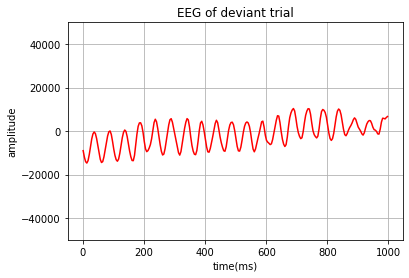

In [17]:
#deviant_trials_container

print(len(regular_trials_container))

all_trials_summed_on_channels = np.zeros(250)
for j,trial in enumerate(regular_trials_container):
    trial_allChannel_data = np.zeros(250)
    for channel in trial:
        for i,frame in enumerate(channel):
            trial_allChannel_data[i] += frame
            all_trials_summed_on_channels[i] += frame

all_trials_summed_on_channels *= 1/104
print(len(all_trials_summed_on_channels))


x_axis_regular = list(range(1, 1000, 4))

# x_axis_regular = np.ones(250)
x_axis_deviant = np.ones(250)

y_axis_regular = all_trials_summed_on_channels
x_axis_deviant = compressed_deviant_variances

fig,ax1 = plt.subplots()

ax1.plot(x_axis_regular,y_axis_regular,c='r')
ax1.set(xlabel='time(ms)', ylabel='amplitude', title='EEG of deviant trial')
ax1.grid()
ax1.set_ylim(-50000,50000)

plt.show()

250


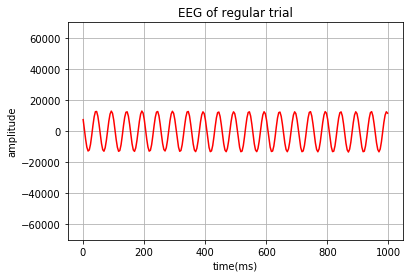

[  7357.04749861   1212.10523424  -5240.1041804  -10342.92350846
 -12836.49149994 -12170.0377085   -8541.81958356  -2810.04793926
   3649.9176516    9222.14944294  12482.59998481  12620.3384916
   9641.30331761   4306.19881377  -2093.21024289  -8014.50147034
 -11987.13373918 -12986.20473425 -10760.36756101  -5920.40584337
    293.91683551   6398.48695829  10967.06175733  12850.61911514
  11470.09694429   7119.5799142     960.6717416   -5405.71940421
 -10460.79020364 -13043.81783905 -12479.37419654  -8801.84370293
  -2936.13284464   3533.15785568   8963.20667211  12140.78806734
  12397.18943108   9608.42621319   4326.2050843   -2165.23784248
  -8163.46463134 -12116.57697327 -13073.3247891  -10857.20485936
  -6050.84083292    160.97060915   6295.13384487  10914.23253942
  12892.78418963  11653.83176155   7418.97496458   1271.54844478
  -5171.70049836 -10305.44876358 -12926.76929741 -12402.1273493
  -8812.073191    -3054.43592995   3369.22756344   8873.86681586
  12213.42872885  12605.608

In [18]:
# print(len(regular_trials_container))

all_trials_summed_on_channels = np.zeros(250)
for j,trial in enumerate(deviant_trials_container):
    trial_allChannel_data = np.zeros(250)
    for channel in trial:
        for i,frame in enumerate(channel):
            trial_allChannel_data[i] += frame
            all_trials_summed_on_channels[i] += frame

all_trials_summed_on_channels *= 1/20
print(len(all_trials_summed_on_channels))


x_axis_regular = list(range(1, 1000, 4))

# x_axis_regular = np.ones(250)
x_axis_deviant = np.ones(250)

y_axis_regular = all_trials_summed_on_channels
x_axis_deviant = compressed_deviant_variances

fig,ax1 = plt.subplots()

ax1.plot(x_axis_regular,y_axis_regular,c='r')
ax1.set(xlabel='time(ms)', ylabel='amplitude', title='EEG of regular trial')
ax1.grid()
ax1.set_ylim(-70000,70000)
plt.show()
print(all_trials_summed_on_channels)

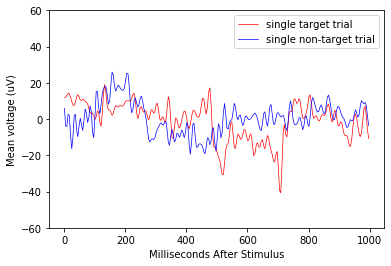

In [35]:
#code to identify special channels to find the average signal 

#deviant_trials_container
#selecting sailient channels based on only the first trial: i.e., deviant_trials_container[0]

maximum_variance = 0
best_channel = -1
for chn,channel in enumerate(deviant_trials_container):
    maximum_variance = max(np.var(channel), maximum_variance)
    if maximum_variance == np.var(channel):
        best_channel = chn


special_channel_data = np.zeros(250)
for tno,trial in enumerate(deviant_trials_container):
    for cno,ch in enumerate(trial):
        if cno == 37 and tno == 6:
            for fno,frame in enumerate(ch):
                special_channel_data[fno] += frame
    

special1_channel_data = np.zeros(250)
for tno,trial in enumerate(regular_trials_container):
    for cno,ch in enumerate(trial):
        if cno == 37 and tno == 2:
            for fno,frame in enumerate(ch):
                special1_channel_data[fno] += frame
    
    
x_axis = list(range(1, 1000, 4))

y_axis = special_channel_data
y_axis1 = special1_channel_data
fig,ax2 = plt.subplots()

ax2.plot(x_axis,y_axis,color='r', label='single target trial', linewidth = 0.7)
ax2.plot(x_axis,y_axis1, color='b', label='single non-target trial', linewidth = 0.7)
ax2.set(xlabel='Milliseconds After Stimulus', ylabel='Mean voltage (uV)')
# ax2.grid()
ax2.legend()
ax2.set_ylim(-60,60)
plt.show()